In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.spatial.distance as dist
from sklearn.neighbors import DistanceMetric
from sklearn.cluster import AgglomerativeClustering

In [2]:
#a. Place the data in a data frame.
proteinConsumption = pd.read_csv('Protein consumption in 25 European countries.csv', delimiter=';', decimal=',')
# print(proteinConsumption)

In [3]:
#c. Which columns do you need to remove in order to perform a Principal Component Analysis?
#Remove any columns with the wrong scale, columns that do not make sense,.....
#Country and Total --> wrong scale (and don't make any sense)
proteinConsumptionCorrect = proteinConsumption.drop(["Country", "Total"], axis=1)

In [4]:
#d. Look at the correlations between the variables. Is the data usable for Principal Component
#Analysis?
# There are several 'moderate' to 'large' correlations
proteinConsumptionCorrelation = proteinConsumption.corr(method="kendall")
# print(proteinConsumptionCorrelation)

Explained variance in %: [0.45505961 0.18054478 0.12059152 0.10055744 0.0474153  0.03854891
 0.02994711 0.01494695 0.01238837]


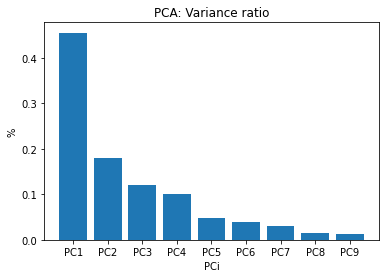

In [5]:
#e. Perform a Principal Component Analysis -do not forget to normalise the data- and interpret
#the results.#e. Perform a Principal Component Analysis -do not forget to normalise the data- and interpret
#the results.
#proteinConsumptionCorrectZ = StandardScaler().fit_transform(proteinConsumptionCorrect)
proteinConsumptionCorrectZ =pd.DataFrame()
for column in proteinConsumptionCorrect:
	mean = proteinConsumptionCorrect[column].mean()
	standev = proteinConsumptionCorrect[column].std()
	proteinConsumptionCorrectZ[column] = (proteinConsumptionCorrect[column] - mean)/standev
proteinConsumptionCorrectZ.index= proteinConsumptionCorrect.index.values
pca_dim = min(proteinConsumptionCorrectZ.shape[1], proteinConsumptionCorrectZ.shape[0])
pcamodel = PCA(pca_dim)
principalComponents = pcamodel.fit_transform(proteinConsumptionCorrectZ)
print('Explained variance in %:', pcamodel.explained_variance_ratio_)

def putIntoBarChart():
	labels_bar = ['PC{}'.format(i) for i in range(1,pca_dim+1)]
	plt.figure()
	plt.bar(labels_bar, pcamodel.explained_variance_ratio_)

	plt.title('PCA: Variance ratio')
	plt.xlabel('PCi')
	plt.ylabel('%')
	plt.show()

putIntoBarChart()


In [6]:
#f. Are there one or more variables that weigh heavily in determining the first Principal
#Component? If so, which ones?
row_labels = ['PC{}'.format(i) for i in range(1,pca_dim+1)]
aij=pd.DataFrame(data=pcamodel.components_,	columns = proteinConsumptionCorrect.columns, index = row_labels)

print(aij)

     Red meat  White meat      Eggs      Milk      Fish   Cereals  \
PC1 -0.310669   -0.315928 -0.420593 -0.378878 -0.134107  0.429829   
PC2 -0.069571   -0.214572 -0.099867 -0.168680  0.651615 -0.253663   
PC3  0.355463   -0.628420 -0.080507  0.404144  0.299714 -0.068157   
PC4  0.596501    0.039612  0.255256 -0.032235 -0.234879 -0.020308   
PC5  0.396586   -0.310600  0.067077 -0.318003 -0.304330  0.185018   
PC6  0.376716    0.081294 -0.664530 -0.017799  0.044765  0.193988   
PC7 -0.227978   -0.146016 -0.035954  0.717990 -0.236836  0.343064   
PC8  0.049688    0.028186  0.467400 -0.102203  0.440552  0.720661   
PC9 -0.250675   -0.576604  0.275019 -0.190342 -0.260035 -0.192188   

     Starchy food  Pulses, nuts and oilseeds  Fruit and vegetables  
PC1     -0.295962                   0.421808              0.122368  
PC2      0.388885                   0.129329              0.503773  
PC3     -0.280855                   0.140301             -0.340415  
PC4     -0.305245                

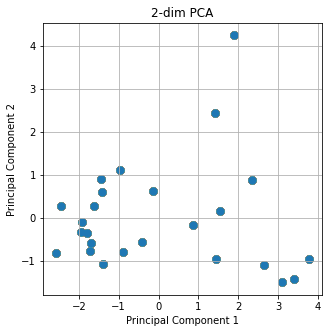

In [7]:
#g. Make a biplot (PC1 and PC2)
def showBiPlot():
	principalDf= pd.DataFrame()
	principalDf['PC1'] = principalComponents[:,0]
	principalDf['PC2'] = principalComponents[:,1]
	fig, ax = plt.subplots(figsize=(5, 5))
	ax.set_xlabel('Principal Component 1')
	ax.set_ylabel('Principal Component 2')
	ax.set_title('2-dim PCA')
	markers = list(matplotlib.markers.MarkerStyle.markers.keys())
	for m in zip(markers):
		ax.scatter(principalDf['PC1'], principalDf['PC2'], s = 50)
	ax.grid(True)
	plt.show()

showBiPlot()

In [8]:
#h. Create a new data frame, taking the first three main components for the observations.
col_names = ['PC{}'.format(i) for i in range(1,4)]
newProteinConsumptionData = pd.DataFrame(data=principalComponents[:,[0,1,2]], columns= col_names)
print(newProteinConsumptionData)

         PC1       PC2       PC3
0   3.406217 -1.431872  1.596648
1  -1.396171 -1.078444 -1.234559
2  -1.627191  0.273942  0.009164
3   3.099611 -1.503337 -0.082357
4  -0.427788 -0.574181 -1.159335
5  -2.442259  0.283050  0.676943
6  -1.424991  0.607825 -1.746831
7  -1.700650 -0.582980  1.972677
8  -1.435430  0.895903  0.161540
9   2.329174  0.865466  1.227337
10  1.430269 -0.950522 -1.782612
11 -2.580979 -0.820376  0.161750
12  1.550158  0.161928  0.053056
13 -1.711559 -0.780130 -0.766301
14 -0.957151  1.109292  1.319851
15 -0.128511  0.631848 -1.522556
16  1.885436  4.236323 -0.235408
17  2.636173 -1.101645 -0.169166
18  1.404284  2.439578 -0.249277
19 -1.919605 -0.088817  1.085800
20 -0.886264 -0.797983  0.228906
21 -1.939677 -0.328778  1.274231
22  0.860766 -0.157742  0.215680
23 -1.800776 -0.344098 -0.872728
24  3.776913 -0.964252 -0.162454


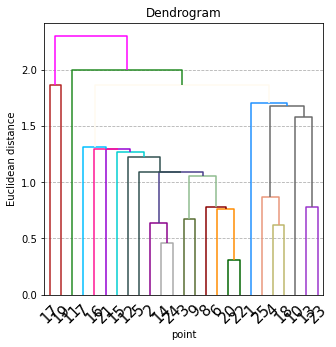

In [9]:
#i. Apply a hierarchical cluster analysis to this (Euclidean distance). Compare the results with the
#results obtained with a cluster analysis applied to the original variables. Compare also with the
#biplot.

def drawDendogram():
    new_Data_Frame = pd.DataFrame(data=principalComponents[:,0:3], index=proteinConsumptionCorrect.index, columns=['PC1', 'PC2','PC3'])


    new_Data_hierarchical_clusters = new_Data_Frame.copy()
    new_Data_hierarchical_clusters.index = range(1, new_Data_hierarchical_clusters.shape[0]+1)
    hcmodel = AgglomerativeClustering(n_clusters=4)
    hcmodel.fit(new_Data_hierarchical_clusters)



    colors = list(matplotlib.colors.cnames.keys())

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
    distances = linkage(new_Data_hierarchical_clusters, method='single')
    ax.set_title('Dendrogram')
    ax.set_xlabel('point')
    ax.set_ylabel('Euclidean distance')
    ax.grid(linestyle='--', axis='y')
    dgram=dendrogram(distances, labels=list(range(1,new_Data_hierarchical_clusters.shape[0]+1)), link_color_func=lambda x: colors[x], leaf_font_size=15, ax=ax)
    plt.show()

drawDendogram()